In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [3]:
# Load S
model_path = "S_magnitude_models_evid_C1.0_e0.1_9features"
train_evids = np.loadtxt(f"{model_path}/train_evids.txt")
test_evids = np.loadtxt(f"{model_path}/test_evids.txt")
test_summary_df = pd.read_csv(f"{model_path}/combined_test_summary_df.csv")
assert test_summary_df.event_identifier.unique().shape == test_evids.shape

In [4]:
network_avg_S_df = pd.merge(test_summary_df.groupby("event_identifier").predicted_magnitude.mean().reset_index(), 
         test_summary_df[["event_identifier", "magnitude"]].drop_duplicates(), how="inner")

In [10]:
model_path = "../P_station_analysis/P_magnitude_models_evid_C1.0_e0.1_9features"
train_evids = np.loadtxt(f"{model_path}/train_evids.txt")
test_evids = np.loadtxt(f"{model_path}/test_evids.txt")
test_summary_df = pd.read_csv(f"{model_path}/combined_test_summary_df.csv")
assert test_summary_df.event_identifier.unique().shape == test_evids.shape

In [11]:
network_avg_P_df = pd.merge(test_summary_df.groupby("event_identifier").predicted_magnitude.mean().reset_index(), 
         test_summary_df[["event_identifier", "magnitude"]].drop_duplicates(), how="inner")

0.9095890350541243


Text(0.5, 3.0, '$R^2$= 0.910')

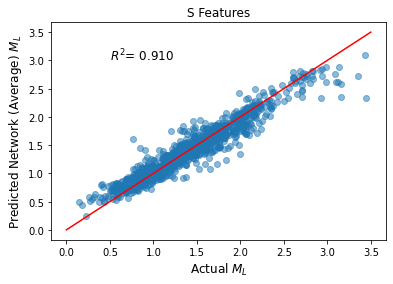

In [13]:
plt.scatter(network_avg_S_df["magnitude"], network_avg_S_df["predicted_magnitude"], alpha=0.5)
plt.plot(np.arange(0, 4, 0.5), np.arange(0, 4, 0.5), color="red")
# r2_score(y_true, y_pred)
network_avg_r2 = r2_score(network_avg_S_df["magnitude"], network_avg_S_df["predicted_magnitude"])
print(network_avg_r2)
plt.xlabel(r"Actual $M_L$", fontsize=12)
plt.ylabel(r"Predicted Network (Average) $M_L$", fontsize=12)
plt.title("S Features", fontsize=12)
plt.text(0.5, 3.0, f"$R^2$={network_avg_r2: 0.3f}", fontsize=12)

0.8988203477655986


Text(0.5, 3.0, '$R^2$= 0.899')

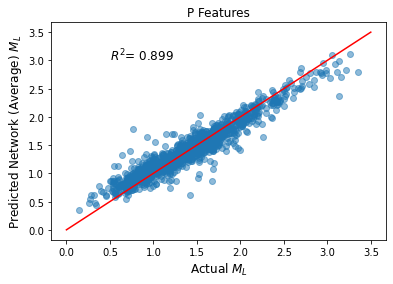

In [15]:
plt.scatter(network_avg_P_df["magnitude"], network_avg_P_df["predicted_magnitude"], alpha=0.5)
plt.plot(np.arange(0, 4, 0.5), np.arange(0, 4, 0.5), color="red")
# r2_score(y_true, y_pred)
network_avg_r2 = r2_score(network_avg_P_df["magnitude"], network_avg_P_df["predicted_magnitude"])
print(network_avg_r2)
plt.xlabel(r"Actual $M_L$", fontsize=12)
plt.ylabel(r"Predicted Network (Average) $M_L$", fontsize=12)
plt.title("P Features", fontsize=12)
plt.text(0.5, 3.0, f"$R^2$={network_avg_r2: 0.3f}", fontsize=12)

P R^2: 0.8988203477655986
S R^2: 0.9095890350541243


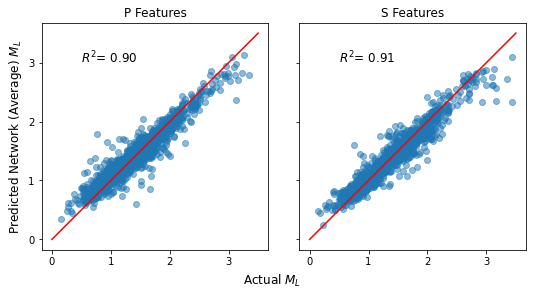

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(7.5, 4), constrained_layout=True)
yticks = np.arange(0, 4.0, 1)
# P
axes[0].scatter(network_avg_P_df["magnitude"], network_avg_P_df["predicted_magnitude"], alpha=0.5)
axes[0].plot(np.arange(0, 4, 0.5), np.arange(0, 4, 0.5), color="red")
P_network_avg_r2 = r2_score(network_avg_P_df["magnitude"], network_avg_P_df["predicted_magnitude"])
print("P R^2:", P_network_avg_r2)
axes[0].text(0.5, 3.0, f"$R^2$={P_network_avg_r2: 0.2f}", fontsize=12)
#axes[0].set_xlabel(r"Actual $M_L$", fontsize=12)
axes[0].set_ylabel(r"Predicted Network (Average) $M_L$", fontsize=12)
axes[0].set_title("P Features", fontsize=12)
axes[0].set_yticks(yticks);
axes[0].set_xticks(yticks);
axes[0].set_aspect('equal', adjustable='box')

# S
axes[1].scatter(network_avg_S_df["magnitude"], network_avg_S_df["predicted_magnitude"], alpha=0.5)
axes[1].plot(np.arange(0, 4, 0.5), np.arange(0, 4, 0.5), color="red")
S_network_avg_r2 = r2_score(network_avg_S_df["magnitude"], network_avg_S_df["predicted_magnitude"])
print("S R^2:", S_network_avg_r2)
axes[1].text(0.5, 3.0, f"$R^2$={S_network_avg_r2: 0.2f}", fontsize=12)
fig.supxlabel(r"Actual $M_L$", fontsize=12)
axes[1].set_title("S Features", fontsize=12)
axes[1].set_yticks(yticks, labels=[]);
axes[1].set_xticks(yticks);
axes[1].set_aspect('equal', adjustable='box')
fig.savefig('../proposal_figs/network_avg.png', dpi=300, bbox_inches='tight')

In [36]:
xticks

array([0., 1., 2., 3., 4.])